# Relatório de Análise VIII

## Identificando e removendo outliers

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure',figsize = (14,6))

In [2]:
dados = pd.read_csv("dados/alugue_residencial.csv",sep = ";")

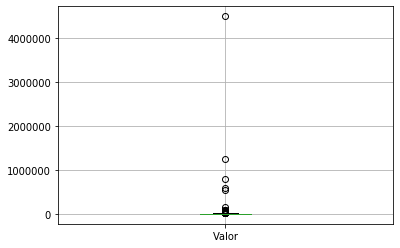

In [4]:
dados.boxplot(["Valor"])

In [6]:
dados[dados["Valor"]>=500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [7]:
valor = dados["Valor"]

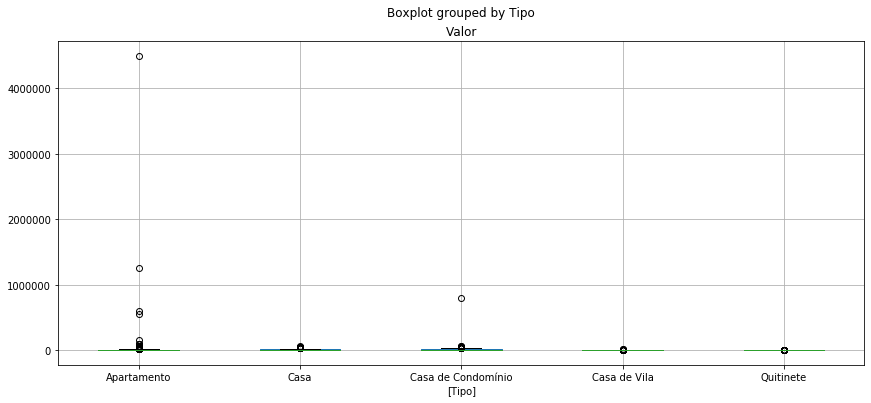

In [10]:
dados.boxplot(["Valor"], by = ["Tipo"])

In [12]:
grupo_tipo = dados.groupby("Tipo")["Valor"]

In [13]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [14]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [15]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [17]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados["Tipo"] == tipo
    eh_dentro_limite = (dados["Valor"] >= limite_inferior[tipo]) & (dados["Valor"] <= limite_superior[tipo])
    selecao = eh_dentro_limite & eh_tipo
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new,dados_selecao])

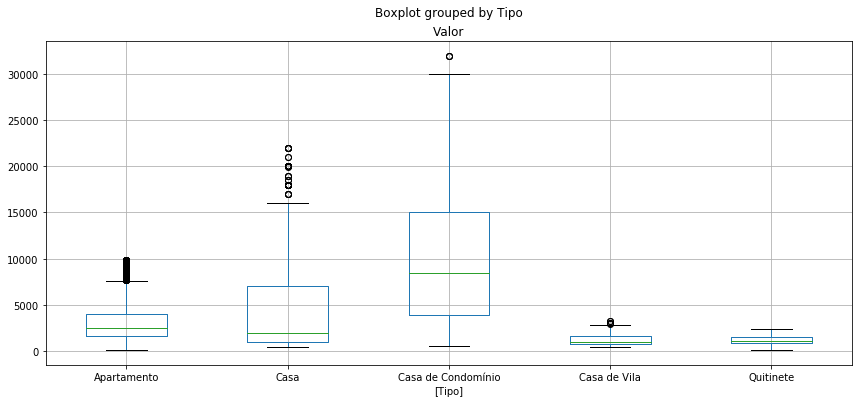

In [18]:
dados_new.boxplot(["Valor"], by = ["Tipo"])

In [19]:
dados_new.to_csv("dados/alugue_residencial_sem_outlierss.csv",index = False,sep = ";")